# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0382 Крючков Артем и Афанасьев Назар. Вариант №10.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Аналоговый сигнал** — это сигнал, непрерывный по времени.

**Дискретный сигнал** — это сигнал, дискретный по времени и непрерывный по состоянию.

Представим дискретный сигнал в виде:

$$s(t)=\sum_{k=-\infty}^{\infty} x_k\delta(t-k)$$

Тогда **спектр дискретного сигнала**:

$$S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}$$

Пусть последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$.

**Дискретное преобразование Фурье (ДПФ)**:

$$X(n)=\sum_{k=0}^{N-1}x_ke^{-i\frac{2 \pi n}{N}k}, \quad n=0,1,2,...,N-1$$

**Обратное дискретное преобразование Фурье (ОДПФ)**:

$$x_k=\frac1n \sum_{n=0}^{N-1} X(n)e^{i\frac{2 \pi k}{N}n}, \quad k=0,1,2,...,N-1$$


**Формула численного дифференцирования 1-го порядка**:

$$y_n=\frac{s_{n+1}-s_{n-1}}{2h}$$

**Формула трапеций**: 

$$y_{n+1}=y_n+\frac{1}{2}\left(s_n+s_{n+1}\right), \quad y_0=0$$

**Формула Симпсона**:

$$y_{n+1}=y_{n-1}+\frac{1}{3}\left(s_{n-1}+4 s_n+s_{n+1}\right), \quad y_0=0 $$

**Формула прямоугольников**:

$$y_{n+1}=y_n+s_{n+\frac{1}{2}}, \quad y_0=0$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Импорт необходимых модулей и определение констант

In [1221]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Был сформирован дискретный сигнал из 32 отсчётов ($N=31$) посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos (\omega_kt+\varphi_k)$.

- Частоты гармоник $\omega_k$ представляют собой числа со значениями от 0 до $\pi$ с шагом $\Delta \omega = 0.1$
- Амплитуды гармоник $A_k$ представляют собой нормализованные случайные (равномерно распределённые) целые числа от 1 до 11
- Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5





In [1222]:
T = 1
N = 31
n = np.arange(0, N + 1, T)

A_k = np.random.randint(1, 12, size=11)
A_k = A_k / np.sum(A_k)
phi_k = np.random.uniform(0, 0.5, size=11)
omega_k = np.arange(0, 1.1, 0.1) * np.pi

t = np.linspace(0, N, 1000)
analog = np.sum([A_k[i] * np.cos(omega_k[i]*t + phi_k[i]) for i in range(11)], axis=0)
discrete = np.sum([A_k[i] * np.cos(omega_k[i]*n + phi_k[i]) for i in range(11)], axis=0)

### Задание 2

Были визуализированы исходный аналоговый и дискретизированный сигналы.

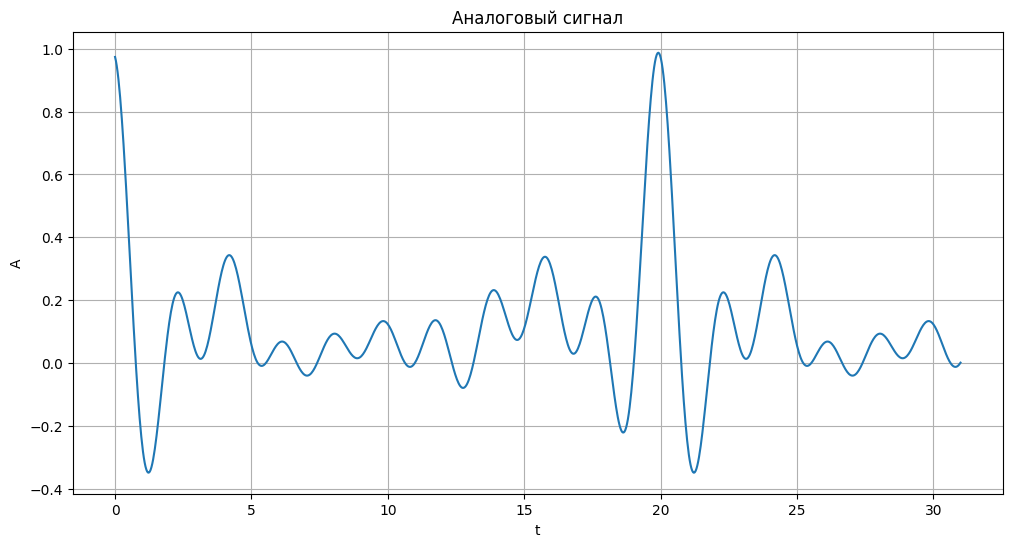

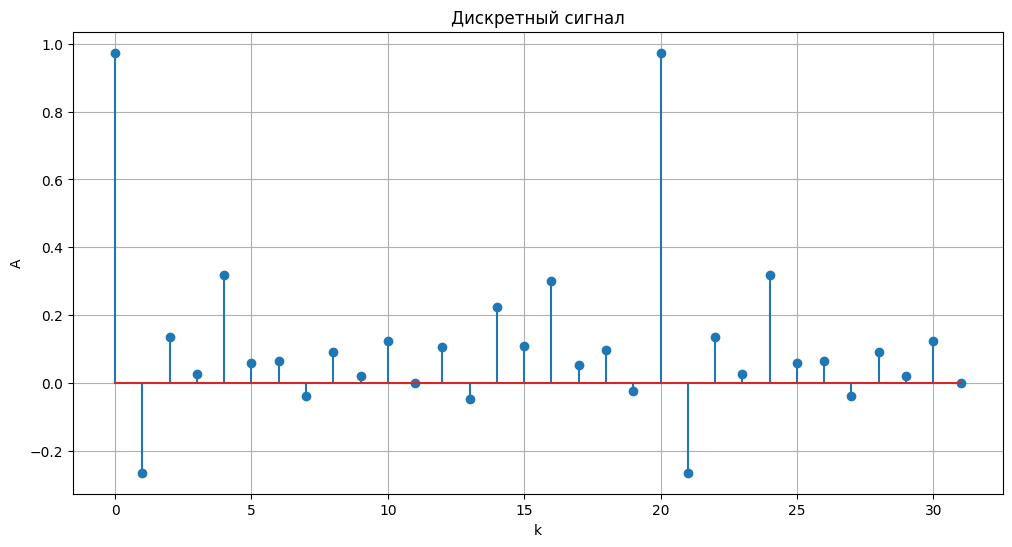

In [1223]:
plt.figure(figsize=(12, 6))
plt.plot(t, analog)
plt.title('Аналоговый сигнал')
plt.xlabel('t')
plt.ylabel('A')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.stem(n, discrete, use_line_collection=True)
plt.title('Дискретный сигнал')
plt.xlabel('k')
plt.ylabel('A')
plt.grid(True)
plt.show()

### Задание 3

С помощью дискретного преобразования Фурье были найдены дискретные отсчеты спектра дискретного сигнала:

$$
S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}
$$

$$
X(n)=\sum_{k=0}^{N-1} x_k e^{-i \frac{2 \pi n}{N} k}, \quad n=0,1,2, \ldots, N-1
$$


$$
\Rightarrow X(n)=S(\frac{2\pi n}{N})=S(\omega\frac{ n}{N})=S(2\pi f\frac{ n}{N}), \quad f\frac{ n}{N} \in [0; \frac{N-1}{N}]
$$

Полученные значения были визуализированы на графике.


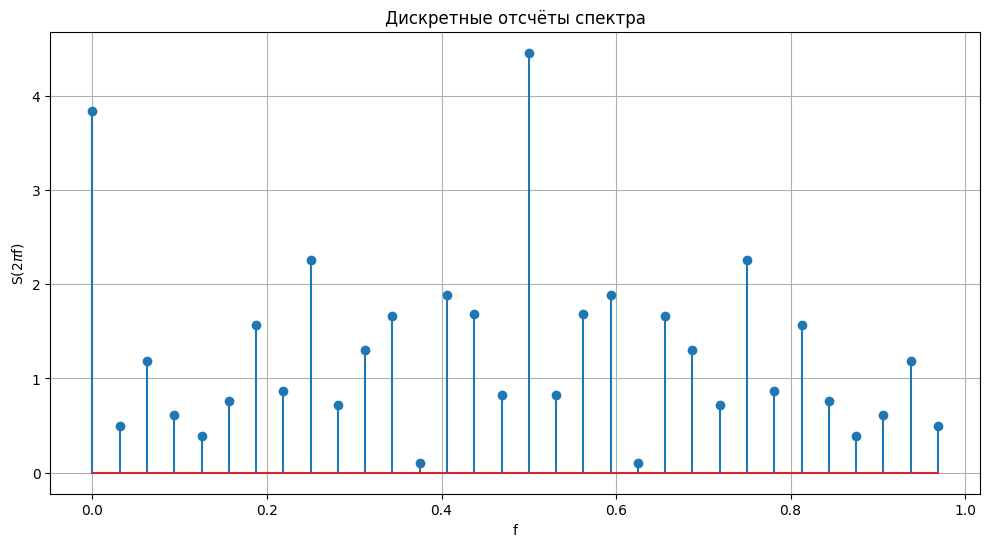

In [1224]:
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

X_n = dft(discrete)
f = np.arange(N+1)/(N+1)

plt.figure(figsize=(12, 6))
plt.stem(f, np.abs(X_n), use_line_collection=True)

def showSpectrum(legend=True):
    plt.title('Дискретные отсчёты спектра')
    plt.xlabel('f')
    plt.ylabel(r'S(2$\pi$f)')
    plt.grid(True)
    if legend: plt.legend()
    plt.show()
showSpectrum(False)

### Задание 4


Для дискретного сигнала было применено линейное сглаживание по 5-ти и 9-ти точкам.

Формула сглаживания прямой линией по $2m+1$ точкам выглядит следующим образом: 

$y_n = \frac1{2m+1} \sum_{k=n-m}^{k=n+m}s_k$

- Для 5-ти точек: $y_n = \frac15 \sum_{k=n-2}^{k=n+2}s_k$

- Для 9-ти точек: $y_n = \frac19 \sum_{k=n-4}^{k=n+4}s_k$

Значение передаточной функции фильтра выглядит следующим образом:

$H(\omega, m)=\frac1{2m+1} \sum_{k=n-m}^{k=n+m}e^{i \omega k}=\frac{\sin(\frac{(2m+1)\omega}{2})}{(2m+1) \sin(\frac{\omega}{2})}$

- Для 5-ти точек: $H(\omega) = \frac{\sin(\frac{5\omega}{2})}{5 \sin(\frac{\omega}{2})}$

- Для 9-ти точек: $H(\omega) = \frac{\sin(\frac{9\omega}{2})}{9 \sin(\frac{\omega}{2})}$

In [1225]:
def smooth_5(s):
    return np.convolve(s, np.ones(5)/5, mode='same')

def smooth_9(s):
    return np.convolve(s, np.ones(9)/9, mode='same')

smoothed_signal_5 = smooth_5(discrete)
smoothed_signal_9 = smooth_9(discrete)

### Задание 5

Были визуализированы полученные после фильтраций дискретные сигналы совместно с исходным дискретным сигналом.

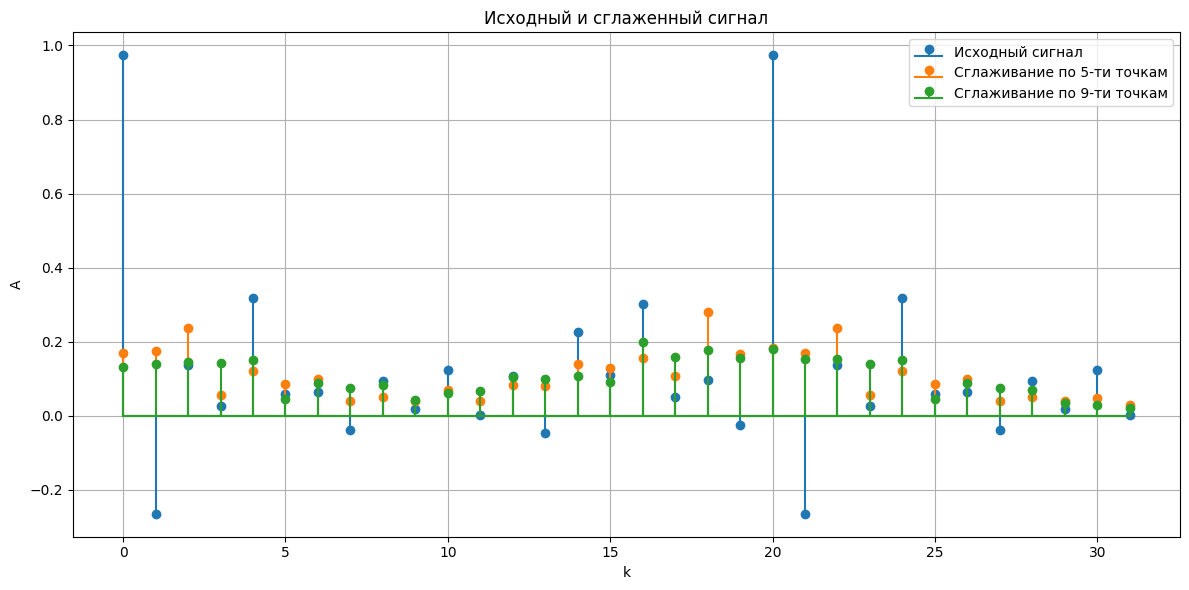

In [1226]:
t = np.arange(N+1)

plt.figure(figsize=(12, 6))
plt.stem(t, discrete, linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный сигнал')
plt.stem(t, smoothed_signal_5, linefmt='C1-', markerfmt='C1o', basefmt='C1-', use_line_collection=True, label='Сглаживание по 5-ти точкам')
plt.stem(t, smoothed_signal_9, linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Сглаживание по 9-ти точкам')

def showSignal():
    plt.title('Исходный и сглаженный сигнал')
    plt.xlabel('k')
    plt.ylabel('A')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
showSignal()

### Задание 6

С помощью ДПФ были найдены дискретные отсчёты спектра дискретного сигнала после его фильтрации и визуализированы совместно с отсчётами спектра исходного дискретного сигнала.

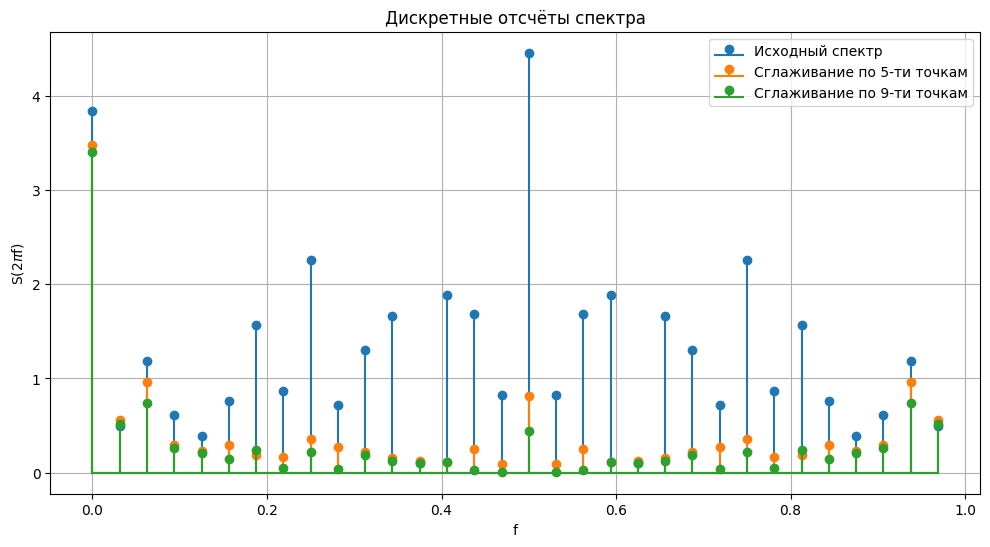

In [1227]:
spectrum_original = dft(discrete)
spectrum_filtered_5 = dft(smoothed_signal_5)
spectrum_filtered_9 = dft(smoothed_signal_9)

plt.figure(figsize=(12, 6))
plt.stem(f, np.abs(spectrum_original), linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный спектр')
plt.stem(f, np.abs(spectrum_filtered_5), linefmt='C1-', markerfmt='C1o', basefmt='C1-', use_line_collection=True, label='Сглаживание по 5-ти точкам')
plt.stem(f, np.abs(spectrum_filtered_9), linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Сглаживание по 9-ти точкам')
showSpectrum()

### Задание 7

Как можно видеть по графикам, изменения значений дискретных отсчётов спектра согласуются со значениями передаточных функций:

- В окрестностях нулевой частоты существует полоса пропускания (так как сигнал непостоянный величина падавления не будет нулевой);
- Высокие частоты (в окрестностях $f=0.5$) сильно подавляются;
- Чем выше количество точек, тем меньше полоса пропускания и тем больше подавление высоких частот.

### Задание 8

#### Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка

##### пункт 4

Для дискретного сигнала был применен дискретный фильтр, соответствующий численному дифференцированию 1-го порядка, формула которого выглядит следуюющим образом:

$y_n=\frac{s_{n+1}-s_{n-1}}{2h}$, где $h=1$ - шаг дискретизации

Значение передаточной функции фильтра выводится следующим образом:

$H(\omega)e^{i\omega n} = \frac{e^{i\omega (n+1)}-e^{i\omega (n-1)}}{2}$

$H(\omega)=\frac{e^{i\omega (n+1)}-e^{i\omega (n-1)}}{2e^{i\omega n}}=\frac{e^{i\omega}-e^{-i\omega}}{2}=i \sin (\omega)$


In [1228]:
def differentiate(s):
    return np.convolve(s, np.array([0.5, 0, -0.5]), mode="same")

diff_signal = differentiate(discrete)

##### пункт 5

Были визуализированы полученный после фильтраций дискретный сигнал совместно с исходным дискретным сигналом.

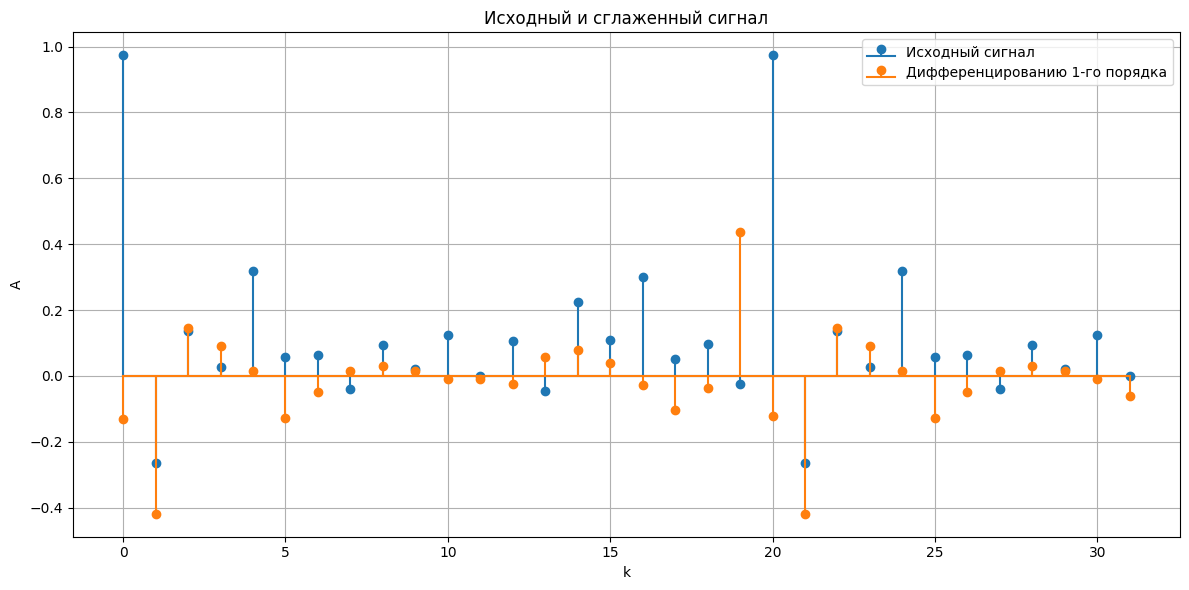

In [1229]:
plt.figure(figsize=(12, 6))
plt.stem(t, discrete, linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный сигнал')
plt.stem(t, diff_signal, linefmt='C1-', markerfmt='C1o', basefmt='C1-', use_line_collection=True, label='Дифференцированию 1-го порядка')
showSignal()

##### пункт 6

С помощью ДПФ были найдены дискретные отсчёты спектра дискретного сигнала после его фильтрации и визуализированы совместно с отсчётами спектра исходного дискретного сигнала.

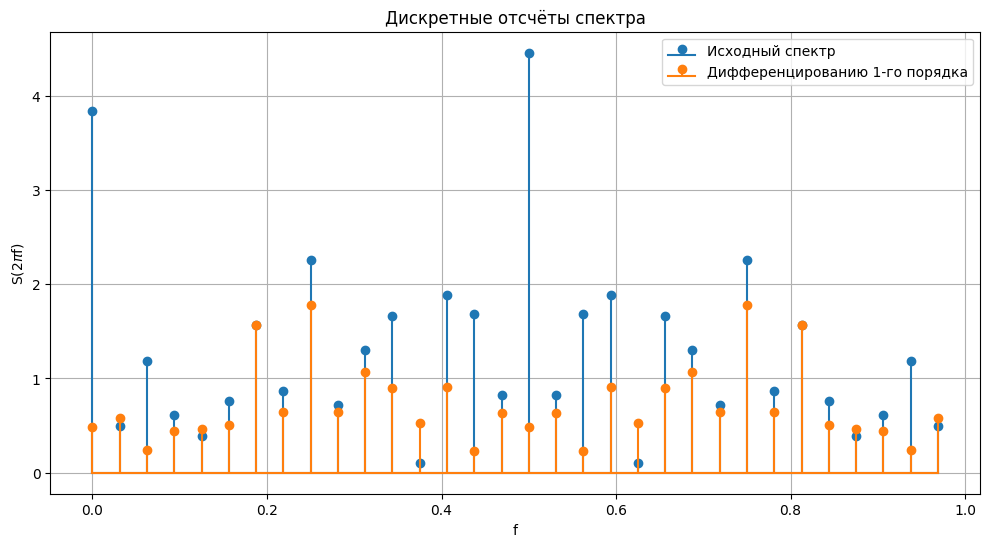

In [1230]:
spectrum_original = dft(discrete)
spectrum_filtered = dft(diff_signal)

plt.figure(figsize=(12, 6))
plt.stem(f, np.abs(spectrum_original), linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный спектр')
plt.stem(f, np.abs(spectrum_filtered), linefmt='C1-', markerfmt='C1o', basefmt='C1-', use_line_collection=True, label='Дифференцированию 1-го порядка')
showSpectrum()

##### пункт 7

Как можно видеть по графикам, изменения значений дискретных отсчётов спектра согласуются со значениями передаточной функции (имеет форму синусоиды):

- Высокие частоты (в окрестностях $f=0.5$) и частоты в окрестности нуля сильно подавляются;
- На средние частоты оказывается меньшее воздействие.

#### Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона)

##### пункт 4

Для дискретного сигнала были применены фильтры, cоответствующие численному интегрированию (прямоугольников, трапеций, Симпсона)

*Формула трапеций*: 

$y_{n+1}=y_n+\frac{1}{2}\left(s_n+s_{n+1}\right), \quad y_0=0$

Значение передаточной функции:

$H(w)=\frac{e^{i \omega}+1}{2(e^{i \omega}-1)}=\frac{\cos (\frac{\omega}{2})}{2 i \sin (\frac{\omega}{2})}$

*Формула Симпсона*:

$y_{n+1}=y_{n-1}+\frac{1}{3}\left(s_{n-1}+4 s_n+s_{n+1}\right), \quad y_0=0 $

Значение передаточной функции:

$H(w)=\frac{4+e^{i \omega}+e^{-i \omega}}{3(e^{i \omega}-e^{-i \omega})}=\frac{\cos (\omega)+2}{3 i \sin (\omega)}$

*Формула прямоугольников*:

$y_{n+1}=y_n+s_{n+\frac{1}{2}}, \quad y_0=0$

Значение передаточной функции:

$H(w)=\frac{e^{0.5 i \omega}}{e^{i \omega}-1}=\frac1{2i \sin (\frac{\omega}2)}$


In [1231]:
def integrate_t(s):
    intermediate = np.convolve(s, np.array([0.5, 0.5]), mode="same")
    intermediate[0] = 0
    return np.cumsum(intermediate)

def integrate_s(s):
    intermediate = np.convolve(s, np.array([0, 1, 4, 1])/3, mode="same")
    intermediate[0] = 0
    return np.ravel([np.cumsum(intermediate[::2]), np.cumsum(intermediate[1::2])],'F')

def integrate_r(s):
    intermediate = np.copy(s)
    intermediate[0] = 0
    return np.cumsum(intermediate)

integrated_signal_s = integrate_s(discrete)
integrated_signal_r = integrate_r(discrete)
integrated_signal_t = integrate_t(discrete)

##### пункт 5

Были визуализированы полученные после фильтраций дискретные сигналы совместно с исходным дискретным сигналом.

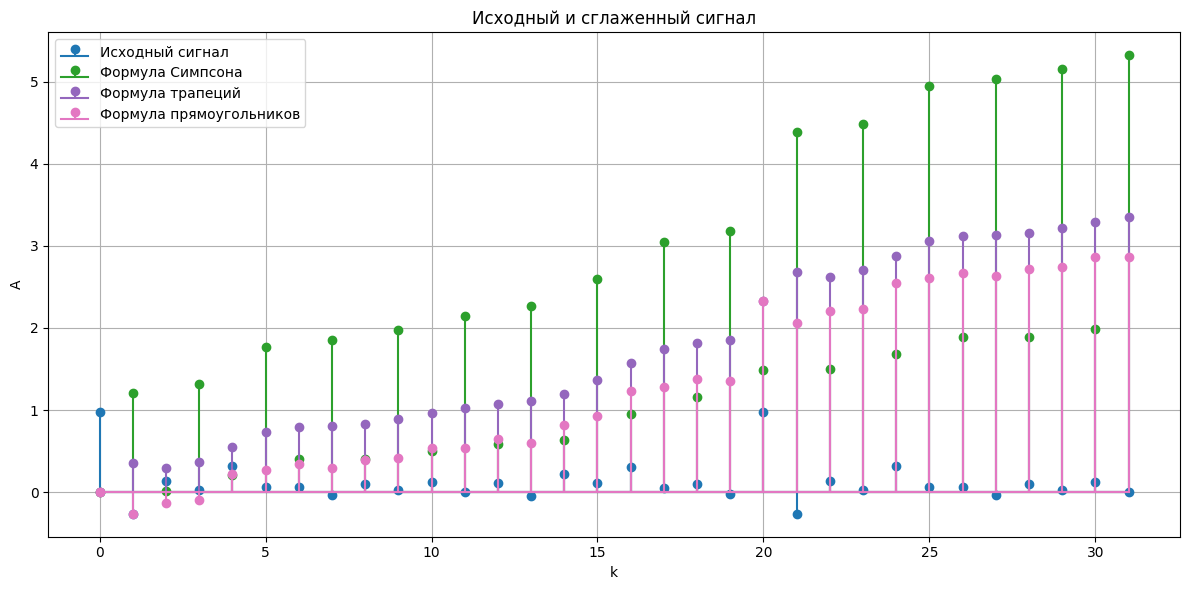

In [1232]:
plt.figure(figsize=(12, 6))
plt.stem(t, discrete, linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный сигнал')
plt.stem(t, integrated_signal_s, linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Формула Симпсона')
plt.stem(t, integrated_signal_t, linefmt='C4-', markerfmt='C4o', basefmt='C4-', use_line_collection=True, label='Формула трапеций')
plt.stem(t, integrated_signal_r, linefmt='C6-', markerfmt='C6o', basefmt='C6-', use_line_collection=True, label='Формула прямоугольников')
showSignal()

##### пункт 6

С помощью ДПФ были найдены дискретные отсчёты спектра дискретного сигнала после его фильтрации и визуализированы совместно с отсчётами спектра исходного дискретного сигнала.

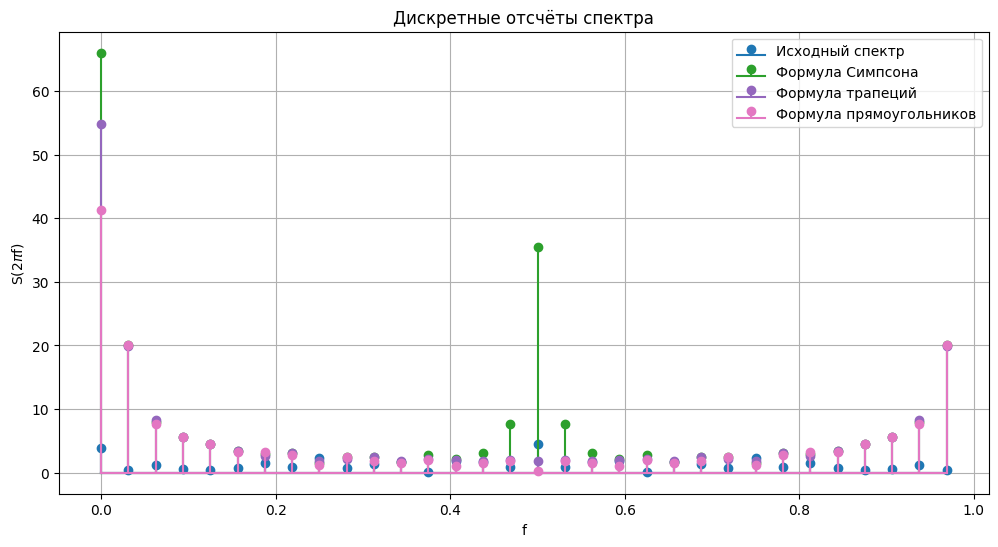

In [1233]:
spectrum_original = dft(discrete)
spectrum_integrated_r = dft(integrated_signal_r)
spectrum_integrated_t = dft(integrated_signal_t)
spectrum_integrated_s = dft(integrated_signal_s)

plt.figure(figsize=(12, 6))
plt.stem(f, np.abs(spectrum_original), linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный спектр')
plt.stem(f, np.abs(spectrum_integrated_s), linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Формула Симпсона')
plt.stem(f, np.abs(spectrum_integrated_t), linefmt='C4-', markerfmt='C4o', basefmt='C4-', use_line_collection=True, label='Формула трапеций')
plt.stem(f, np.abs(spectrum_integrated_r), linefmt='C6-', markerfmt='C6o', basefmt='C6-', use_line_collection=True, label='Формула прямоугольников')
showSpectrum()

##### пункт 7

Как можно видеть по графикам, изменения значений дискретных отсчётов спектра согласуются со значениями передаточных функций:

- В окрестностях нулевой частоты все формулы сильно усиливают сигнал;
- Высокие частоты (в окрестностях $f=0.5$) усиливаются формулами прямоугольников и Симпсона, но подавляются формулой трапеций;
- При переходе от низких частот к средним степень усиления сигнала понижается для всех формул. 

## Выводы

В результате выполнения практической работы был получен опыт выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). Исследуемый дискретный сигнал был сформирован посредством дискретизации непрерывного сигнала, представляющего собой линейную комбинацию гармонических функций. Для полученного сигнала были найдены дискретные отсчёты спектра при помощи дискретного преобразования Фурье. Этот спектр был сравнён со спректрами модифицированных сигналов: при применении фильтров, соответсвующих формулам численного дифференцирования (1-го порядка) и интегрирования (формулы трапеций, прямоугольников и Симпсона). Изменения в значениях отсчётов спектров были сопоставлены с характером передаточных функций соответсвующих фильтров. Были выявлены схожие зависимости для конкретных формул.